# Read the dataset

In [2]:
import pandas as pd

data=pd.read_csv("Admission_Predict_Ver1.1.csv")
data


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
data.shape

(500, 9)

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
my_columns = data.columns
l = []
for column in my_columns:
    striped_columns  = column.strip()
    l.append(striped_columns)
data.columns = l
data.columns
    

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [8]:
# define features and the target 

y = data["Chance of Admit"]

In [9]:
"Chance of Admit ".strip() # removing the spaces 

'Chance of Admit'

In [10]:
x = data.drop(["Serial No.",'Chance of Admit'],axis=1)

In [11]:
from sklearn.model_selection import train_test_split


In [12]:
x_train ,x_test,y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((400, 7), (100, 7), (400,), (100,))

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [15]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler


In [17]:
scaler = MinMaxScaler()

scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

x_test_scaled = scaler.transform(x_test)



In [18]:
x_train_scaled

array([[0.62      , 0.67857143, 0.5       , ..., 0.71428571, 0.65064103,
        1.        ],
       [0.52      , 0.67857143, 0.75      , ..., 1.        , 0.55769231,
        0.        ],
       [0.26      , 0.35714286, 0.5       , ..., 0.42857143, 0.54487179,
        0.        ],
       ...,
       [0.24      , 0.25      , 0.        , ..., 0.14285714, 0.14423077,
        0.        ],
       [0.38      , 0.46428571, 0.25      , ..., 0.71428571, 0.28205128,
        0.        ],
       [0.48      , 0.5       , 0.25      , ..., 0.57142857, 0.46474359,
        0.        ]])

In [19]:
x_train_scaled.shape

(400, 7)

In [20]:
x_train_scaled.min()

np.float64(0.0)

In [21]:
x_test_scaled.max()

np.float64(1.0)

# Build the model

In [22]:
from sklearn.linear_model import LinearRegression 


In [23]:
my_model = LinearRegression()
# trian the model with xtrain , ytrain 
my_model.fit(x_train_scaled,y_train)

LinearRegression()

In [24]:
my_model.coef_ # it give me the m(slope of the x ) if the weight (slope ) is high that mean it highly affect on my target 

array([0.12172192, 0.08388445, 0.01027519, 0.00725476, 0.06033294,
       0.3510845 , 0.02402679])

In [25]:
x.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

In [26]:
my_model.intercept_

np.float64(0.3555840502252707)

that is mean my equation is 
y=0.12172192x1 + 0.08388445x2 + 0.01027519x3 + ....+ 0.3555840502252707

In [27]:
import sklearn 
sklearn.__version__

'1.5.2'

In [28]:
y_pred=my_model.predict(x_test_scaled)

In [29]:
y_pred.shape

(100,)

In [30]:
y_pred


array([0.91457473, 0.79518127, 0.57265986, 0.70736968, 0.81588282,
       0.86206561, 0.47459746, 0.64850923, 0.82378728, 0.80741498,
       0.72193204, 0.72589118, 0.65632227, 0.93677168, 0.8241518 ,
       0.50979177, 0.83931942, 0.59727295, 0.53339576, 0.57155958,
       0.66548168, 0.55305833, 0.72232308, 0.79506004, 0.78027648,
       0.60248654, 0.94840363, 0.84741471, 0.62777011, 0.74343096,
       0.55533035, 0.73004034, 0.54474225, 0.86116288, 0.65713016,
       0.7371816 , 0.55423839, 0.95718977, 0.64364267, 0.71057279,
       0.97036982, 0.57495143, 0.67075391, 0.85830422, 0.94112903,
       0.57793762, 0.9583926 , 0.83902765, 0.79591651, 0.92570648,
       0.88805969, 0.56366238, 0.70359711, 0.52658929, 0.9536427 ,
       0.59746814, 0.95600396, 0.73916386, 0.66256982, 0.5012903 ,
       0.62950759, 0.68031188, 0.59896721, 0.59203806, 0.44085868,
       0.58866369, 0.8667547 , 0.89783006, 0.65831807, 0.70667392,
       0.6176818 , 0.78587721, 0.69152566, 0.56271019, 0.55429

# Build the model using descsion Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(random_state= 0,max_depth=3)


In [32]:
decision_tree_regressor.fit(x_train_scaled,y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [33]:
y_pred_decision = decision_tree_regressor.predict(x_test_scaled)

In [34]:
y_pred_decision

array([0.94692308, 0.77945455, 0.60676471, 0.67158333, 0.77945455,
       0.89954545, 0.50702128, 0.67158333, 0.89954545, 0.77945455,
       0.73956522, 0.67158333, 0.60676471, 0.89954545, 0.89954545,
       0.50702128, 0.77945455, 0.67158333, 0.50702128, 0.50702128,
       0.67158333, 0.50702128, 0.67158333, 0.77945455, 0.73956522,
       0.67158333, 0.94692308, 0.84035714, 0.67158333, 0.67158333,
       0.50702128, 0.77945455, 0.50702128, 0.89954545, 0.60676471,
       0.73956522, 0.50702128, 0.94692308, 0.67158333, 0.67158333,
       0.94692308, 0.50702128, 0.67158333, 0.84035714, 0.94692308,
       0.67158333, 0.94692308, 0.77945455, 0.73956522, 0.94692308,
       0.89954545, 0.50702128, 0.67158333, 0.50702128, 0.94692308,
       0.60676471, 0.94692308, 0.77945455, 0.67158333, 0.50702128,
       0.67158333, 0.67158333, 0.67158333, 0.50702128, 0.50702128,
       0.60676471, 0.89954545, 0.89954545, 0.67158333, 0.73956522,
       0.67158333, 0.73956522, 0.73956522, 0.60676471, 0.50702

# Evaluation the model (Linear Regression)

In [35]:
from sklearn.metrics import r2_score ,mean_absolute_error , mean_squared_error


In [36]:
r2_score(y_test,y_pred) # y_test >> is the actual data in the target column 
# y_pred >> is the predicted data 

0.8188432567829628

In [37]:
mean_absolute_error(y_test,y_pred)

np.float64(0.042722654277053664)

# Evaluation of Decision Tree Model

In [38]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,y_pred_decision)

np.float64(0.05077331404297938)

In [39]:
r2_score(y_test,y_pred_decision) # before using gridsearch for best parmeters >>0.6163784674442085

0.738628869572069

# Visualize the structure of decision tree regressor

In [40]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression


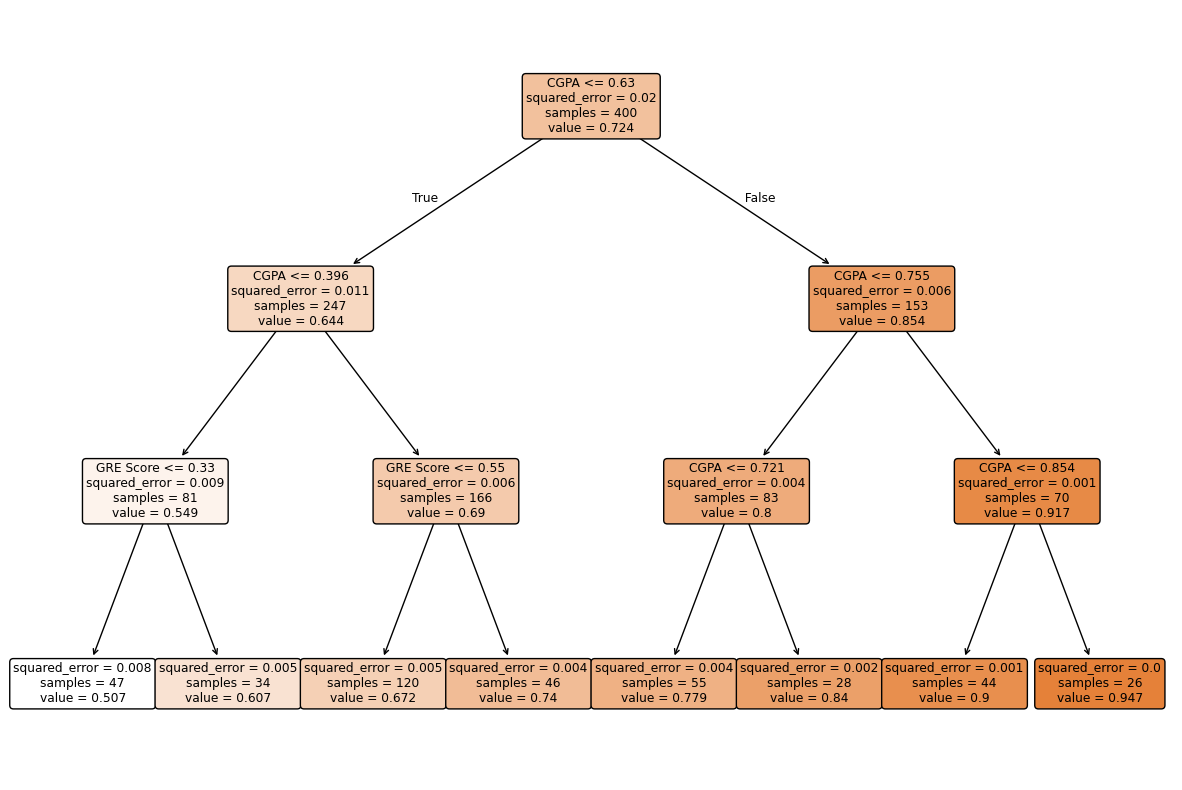

In [41]:
plt.figure(figsize=(15,10))
plot_tree(decision_tree_regressor,filled=True,rounded=True,feature_names=x.columns)
plt.show()

In [42]:
importance = decision_tree_regressor.feature_importances_
importance

array([0.0562889, 0.       , 0.       , 0.       , 0.       , 0.9437111,
       0.       ])

In [43]:
feature_names = x.columns
feature_names

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

We found that CGPA feature is the most importance feature that affect on our target 

<BarContainer object of 7 artists>

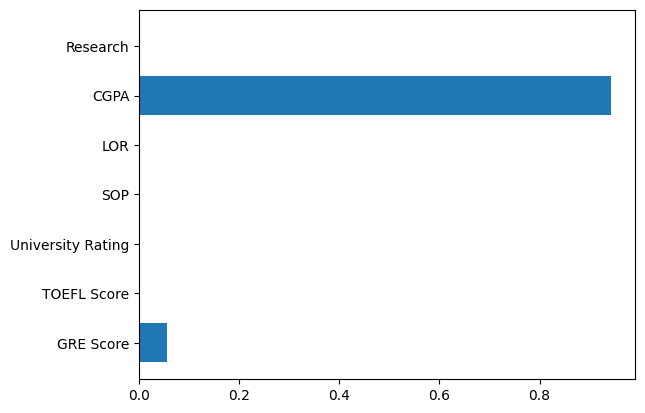

In [44]:
plt.barh(feature_names,importance)

# Build the model using Random forest

In [45]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state= 0,max_depth=4)



In [46]:
regr.fit(x_train,y_train)

RandomForestRegressor(max_depth=4, random_state=0)

In [47]:
y_pred_regr = regr.predict(x_test)

In [48]:
y_pred_regr

array([0.9437713 , 0.78310084, 0.59946466, 0.70817455, 0.79621836,
       0.88510828, 0.47005531, 0.65922781, 0.86088242, 0.78359126,
       0.71933167, 0.72716824, 0.67030009, 0.91961362, 0.87306873,
       0.52385074, 0.81399659, 0.60546976, 0.55250968, 0.54201252,
       0.64681559, 0.52239751, 0.70794697, 0.76805979, 0.75011179,
       0.61365   , 0.93686109, 0.83294167, 0.65291894, 0.71471329,
       0.56176359, 0.74687238, 0.56194464, 0.8850316 , 0.61785616,
       0.72978096, 0.5566807 , 0.94201488, 0.63791392, 0.69684307,
       0.94953044, 0.53511862, 0.68591814, 0.83104548, 0.9437713 ,
       0.61541339, 0.94422108, 0.80356261, 0.75953268, 0.93045364,
       0.90327002, 0.54372926, 0.67828104, 0.46180272, 0.94378915,
       0.63863691, 0.95017142, 0.75546382, 0.66152798, 0.46290778,
       0.63184443, 0.6877714 , 0.63157689, 0.56540818, 0.46534014,
       0.60425126, 0.89198301, 0.89851917, 0.6805959 , 0.71333166,
       0.61384771, 0.75957193, 0.71224596, 0.58145146, 0.55636

In [49]:
importances = regr.feature_importances_
importances

array([0.13843486, 0.01872721, 0.00364011, 0.00775132, 0.00765255,
       0.81798667, 0.00580727])

In [50]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [51]:
feature_names = x.columns
feature_names

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

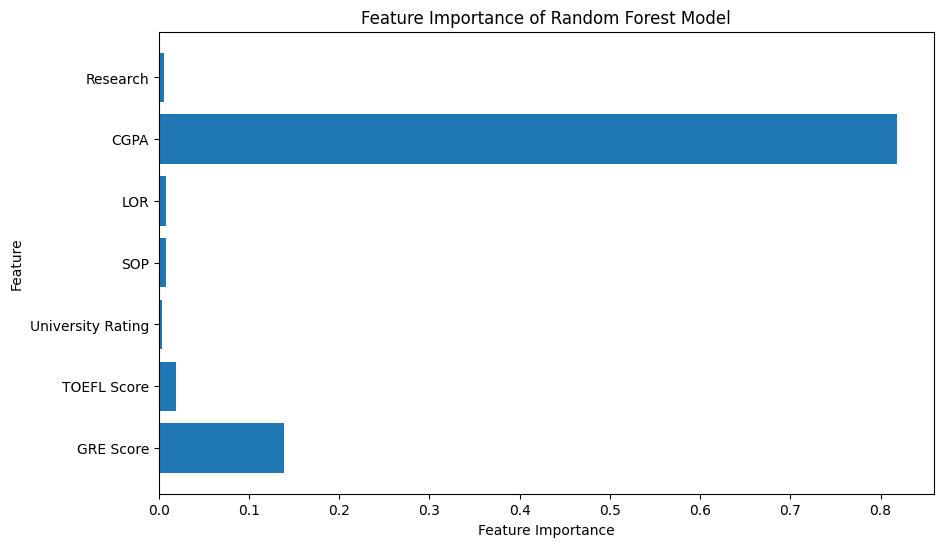

In [52]:
plt.figure(figsize=(10,6))

plt.barh(feature_names,importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance of Random Forest Model")
plt.show()

# Evaluation of Random forest model

In [53]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,y_pred_regr)

np.float64(0.042887430592884385)

In [54]:
r2_score(y_test,y_pred_regr)

0.8003343237260884

# visualization

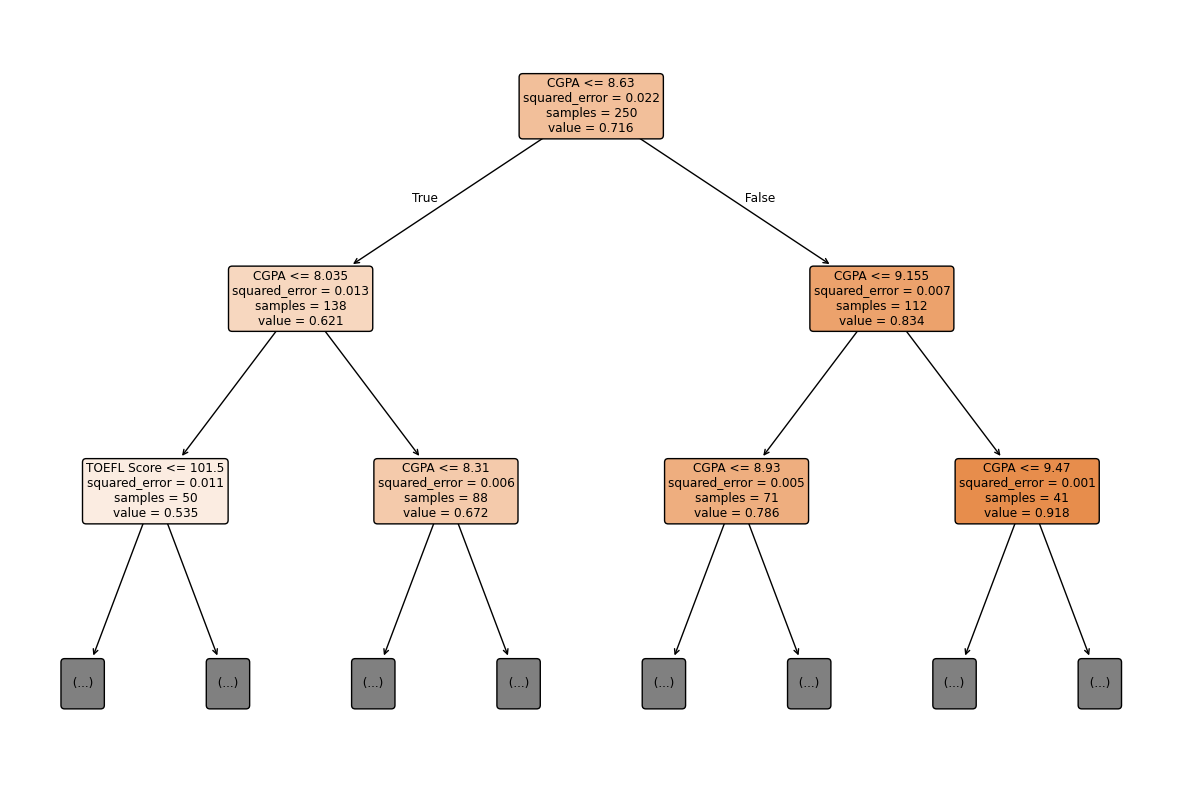

In [55]:
plt.figure(figsize=(15,10))
plot_tree(regr.estimators_[0],filled=True,rounded=True,max_depth=2,feature_names=x.columns)
plt.show()

# Bagging Regressor

In [56]:
from sklearn.ensemble import BaggingRegressor

Bagging_Tree = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=0),
                                n_estimators=8,random_state=0,n_jobs=-1,verbose=5,max_samples=0.5)

In [57]:
Bagging_Tree.fit(x_test,y_test)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    5.2s remaining:    5.2s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    5.4s finished


BaggingRegressor(estimator=DecisionTreeRegressor(random_state=0),
                 max_samples=0.5, n_estimators=8, n_jobs=-1, random_state=0,
                 verbose=5)

In [58]:
y_pred_bagging_tree = Bagging_Tree.predict(x_test)
y_pred_bagging_tree

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


array([0.92125, 0.81125, 0.49   , 0.7325 , 0.79875, 0.8875 , 0.4925 ,
       0.61875, 0.79   , 0.76125, 0.6575 , 0.735  , 0.6475 , 0.9125 ,
       0.86375, 0.4675 , 0.845  , 0.615  , 0.52375, 0.52375, 0.6775 ,
       0.52625, 0.7225 , 0.7725 , 0.7125 , 0.68   , 0.92375, 0.86   ,
       0.6575 , 0.72875, 0.58375, 0.70125, 0.55   , 0.8675 , 0.70375,
       0.72   , 0.6125 , 0.935  , 0.6925 , 0.615  , 0.93   , 0.50375,
       0.685  , 0.8475 , 0.9125 , 0.63625, 0.915  , 0.8175 , 0.7575 ,
       0.935  , 0.895  , 0.56875, 0.6975 , 0.5025 , 0.925  , 0.5825 ,
       0.92   , 0.67375, 0.6775 , 0.465  , 0.64375, 0.69   , 0.6525 ,
       0.695  , 0.4725 , 0.55875, 0.89375, 0.89625, 0.7    , 0.705  ,
       0.67875, 0.76375, 0.70625, 0.57625, 0.61   , 0.645  , 0.84375,
       0.835  , 0.555  , 0.66   , 0.78375, 0.835  , 0.65875, 0.82875,
       0.71125, 0.655  , 0.695  , 0.72875, 0.78875, 0.6875 , 0.72   ,
       0.91   , 0.885  , 0.66   , 0.73375, 0.47125, 0.6925 , 0.71625,
       0.69875, 0.64

In [59]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [60]:
Bagging_Tree.estimator_

DecisionTreeRegressor(random_state=0)

In [61]:
Bagging_Tree.n_features_in_

7

In [62]:
Bagging_Tree.feature_names_in_

array(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR',
       'CGPA', 'Research'], dtype=object)

In [63]:
Bagging_Tree.estimators_

[DecisionTreeRegressor(random_state=2087557356),
 DecisionTreeRegressor(random_state=132990059),
 DecisionTreeRegressor(random_state=1109697837),
 DecisionTreeRegressor(random_state=123230084),
 DecisionTreeRegressor(random_state=633163265),
 DecisionTreeRegressor(random_state=998640145),
 DecisionTreeRegressor(random_state=1452413565),
 DecisionTreeRegressor(random_state=2006313316)]

# Evaluation Bagging using Decision Tree

Importance: By setting max_samples lower than 1.0, you reduce the number of samples each estimator sees, which can help reduce overfitting. Lower values create more variability among estimators.

In [64]:
r2_score(y_test,y_pred_bagging_tree) # 0.9677804944308612 before seting max_samples = 0.5 

0.9065816014669927

# Gradiant Boosting Regressor

In [65]:

from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(random_state=0,n_estimators=150,loss="squared_error")
GBR.fit(x_train,y_train)



GradientBoostingRegressor(n_estimators=150, random_state=0)

In [66]:
y_pred_GBR = GBR.predict(x_test)

In [67]:
y_pred_GBR

array([0.93833819, 0.77742366, 0.63886837, 0.70758767, 0.78179169,
       0.87649097, 0.49117399, 0.62334402, 0.8354082 , 0.78849207,
       0.71600683, 0.70158791, 0.69410582, 0.93088639, 0.84419584,
       0.56923477, 0.83445691, 0.56709924, 0.53450811, 0.53274957,
       0.67866287, 0.54651048, 0.72757237, 0.77688332, 0.76866459,
       0.64351932, 0.94249131, 0.85093844, 0.68897327, 0.74055499,
       0.56229239, 0.7422234 , 0.51781155, 0.88564936, 0.63109174,
       0.74345023, 0.56890572, 0.95049016, 0.67294485, 0.68124114,
       0.95360059, 0.58442137, 0.69055847, 0.84849638, 0.9420457 ,
       0.60823973, 0.93964722, 0.81064642, 0.75879582, 0.9259796 ,
       0.9074933 , 0.55752581, 0.68526013, 0.48703367, 0.94906703,
       0.63734147, 0.95248175, 0.73473273, 0.59882054, 0.41765816,
       0.590209  , 0.69696939, 0.60121205, 0.57307111, 0.48151974,
       0.58730242, 0.88948761, 0.90329985, 0.65497466, 0.73625455,
       0.60989117, 0.76739969, 0.69523112, 0.62666577, 0.57450

# Evaluation Grediant Boosting Regressor (GBR)

In [68]:
r2_score(y_test,y_pred_GBR)

0.7734317035408722

# GridsearchCV with Gradiant Boosting

In [69]:
from sklearn.model_selection import GridSearchCV
parameters = {"max_depth": [2,3,6,7],
              "random_state":[2,6,7,3],
              "n_estimators":[100,200],
              "loss":["squared_error","absolute_error"]
              
              

}
grid = GridSearchCV(GBR,parameters)

In [70]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(n_estimators=150,
                                                 random_state=0),
             param_grid={'loss': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 6, 7], 'n_estimators': [100, 200],
                         'random_state': [2, 6, 7, 3]})

In [71]:
grid.best_score_

np.float64(0.7878133213830651)

In [72]:
grid.best_estimator_

GradientBoostingRegressor(max_depth=2, random_state=7)

In [73]:
grid.feature_names_in_

array(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR',
       'CGPA', 'Research'], dtype=object)

In [74]:
y_pred_clf = clf.predict(x_test)

NameError: name 'clf' is not defined

In [ ]:
y_pred_clf

array([0.91909014, 0.77319721, 0.60211499, 0.70505682, 0.77543615,
       0.88032278, 0.47646455, 0.64425662, 0.84283563, 0.78666019,
       0.7199742 , 0.71310447, 0.70060824, 0.93603471, 0.85787331,
       0.5531672 , 0.8335476 , 0.57173409, 0.51375238, 0.54087328,
       0.66387708, 0.53116868, 0.73136562, 0.77377504, 0.74756653,
       0.60536608, 0.93369811, 0.84327863, 0.66033632, 0.73781782,
       0.53850759, 0.74554896, 0.5746126 , 0.89091586, 0.64198281,
       0.73823152, 0.53742549, 0.94957312, 0.63548712, 0.69891183,
       0.95649194, 0.53478618, 0.67777778, 0.84862253, 0.94518888,
       0.59648015, 0.93809882, 0.79875503, 0.77125878, 0.91755226,
       0.9140347 , 0.54150042, 0.70480487, 0.46765775, 0.94830564,
       0.66846828, 0.93514853, 0.73390983, 0.65474014, 0.44615679,
       0.62519198, 0.69525566, 0.61933645, 0.57221784, 0.46637761,
       0.58943514, 0.89091586, 0.90537916, 0.66101564, 0.72287499,
       0.59354382, 0.75110121, 0.70758606, 0.56753552, 0.54382

# GridsearchCV with Decision Tree Regressor

In [ ]:
param = {
    "max_depth":[10,2,7,5,3],
    "random_state": [42,11,10,0],
    
    
}

In [ ]:
Grid_Tree = GridSearchCV(DecisionTreeRegressor(random_state=42),param_grid=param,verbose=3,n_jobs=-1).fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
Grid_Tree.best_estimator_

DecisionTreeRegressor(max_depth=3, random_state=0)

In [ ]:
Grid_Tree.best_params_

{'max_depth': 3, 'random_state': 0}

In [ ]:
Grid_Tree.best_score_

np.float64(0.7318014233814989)

# crossvalidation